#MÓDULO 4 - PARTE 2

##Iniciando um projeto de DataScience

In [5]:
#Precisei ir no terminal e colocar novamente o ambiente virtual pra ser o venv_streamlit
#Pra isso eu fiz o compando: .\venv_streamlit\Scripts\activate ,desse modo acesso a pasta e ativo o amb virtual
#Em seguida, fiz o comando pip install pandas pra ele instalar o pacote pandas

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

caminho_2019='../dados/obitos-2019.csv'
caminho_2020='../dados/obitos-2020.csv'

dados_2019=pd.read_csv(caminho_2019)
dados_2020=pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

Matplotlib is building the font cache; this may take a moment.
2019 (12388, 6)
2020 (14962, 6)


In [8]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [9]:
#Desafio 01: Acessar o portal e verificar como são classificados os dados. 

##Exploração dos dados

In [14]:
dados_2020.sample(5) #posso er 5 dados aleatórios dessa maneira. 

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
10005,SP,COVID,HOSPITAL,70 - 79,F,5260
10456,CE,SRAG,OUTROS_SERVICOS_SAUDE,80 - 89,M,11
3112,GO,PNEUMONIA,DOMICILIO,30 - 39,F,3
14048,SP,OUTRAS,DOMICILIO,> 100,F,555
702,RJ,OUTRAS,IGNORADO,< 9,M,2


In [17]:
len(dados_2020['uf'].unique())
#ambos os conjuntos de dados tem os 27 estados. 

7

In [18]:
#verificando quais os tipos de doença que tem nos dados:
dados_2020['tipo_doenca'].unique()

#SRAG = Sindrome respiratória aguda grave

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [21]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2326
SEPTICEMIA                    2065
INDETERMINADA                 1309
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [22]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3807
INSUFICIENCIA_RESPIRATORIA    2343
PNEUMONIA                     2217
COVID                         2117
SEPTICEMIA                    2037
INDETERMINADA                 1352
SRAG                          1089
Name: tipo_doenca, dtype: int64

In [23]:
#Desafio 02: Fazer a soma dos valores em vez de quantas vezes o termo aparece como fizemos acima

In [35]:
total_obitos_2019=dados_2019.groupby('tipo_doenca').sum()
total_obitos_2019

#ele automaticamente só soma pra mim a coluna total, pois é a única que apresenta valores, as outras são strings. 

,total
tipo_doenca,
COVID,1
INDETERMINADA,6993
INSUFICIENCIA_RESPIRATORIA,100734
OUTRAS,661630
PNEUMONIA,226449
SEPTICEMIA,175624
SRAG,1498


In [36]:
total_obitos_2020=dados_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,196220
INDETERMINADA,9739
INSUFICIENCIA_RESPIRATORIA,99274
OUTRAS,692778
PNEUMONIA,182430
SEPTICEMIA,163235
SRAG,16605


In [37]:
dados_2019.info()

#só pra gente visualizar que realmente o total é o único que é valor numérico.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12388 entries, 0 to 12387
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12388 non-null  object
 1   tipo_doenca   12388 non-null  object
 2   local_obito   12388 non-null  object
 3   faixa_etaria  12388 non-null  object
 4   sexo          12386 non-null  object
 5   total         12388 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 580.8+ KB


In [38]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

#assim podemos ver o crescmento enorme da covid em 2020 em relação à 2019

#Existe um problema de subnotificação da covid, por isso aumentou o SRAG também. 
#Existem vários motivos pra isso acontecer, um deles é a falta de testes para todos. 

,total
tipo_doenca,
COVID,196220.000000
INDETERMINADA,1.392678
INSUFICIENCIA_RESPIRATORIA,0.985506
OUTRAS,1.047078
PNEUMONIA,0.805612
SEPTICEMIA,0.929457
SRAG,11.084780


In [40]:
#Posso mudar minhas configuração clicando na engrenagem > settings > na parte superior clicar em 'open Settings'
#Assim abro o json e posso alterar o tamanho da minha fonte. Basta salvar com ctrl+S
#Desafio extra: aumentar a fonte do output, pois essa configuração acima só alterou a fonte do editor. 

In [ ]:
#Desafio 03: Explorar os outros campos da base de dados. 

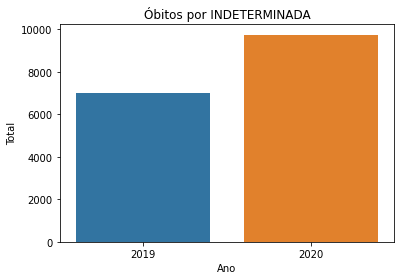

In [54]:
#Vamos então visualizar nossos dados: 

def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    
    #fazendo uma lista com o total por tipo da doença
    lista = [int(total_2019.loc[causa]),int(total_2020.loc[causa])]

    #criando um dataframe com os dados que fizemos no loc. 
    dados = pd.DataFrame({'Total': lista,
                            'Ano':[2019,2020]})

    #plotando o gráfico:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()

#retornando o total
grafico_comparativo('INDETERMINADA')

In [41]:
#Mostrando o que o loc faz:
total_obitos_2019.loc['SRAG']

total    1498
Name: SRAG, dtype: int64